In [278]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns 
from math import pi

# Data import
wimbledon_path = "./data/tennis/Wimbledon-men-2013_mod.csv"
tennis = pd.read_csv(wimbledon_path)


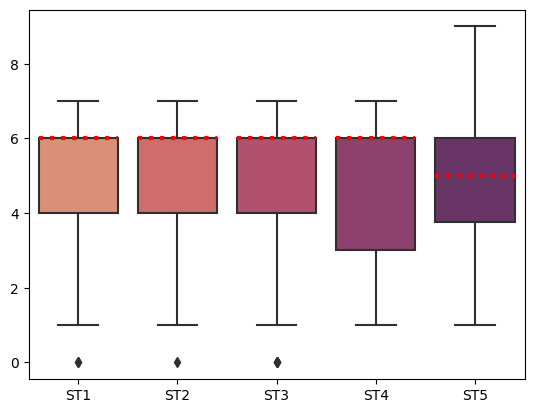

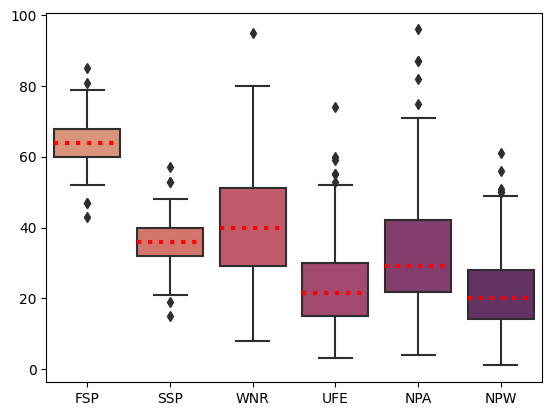

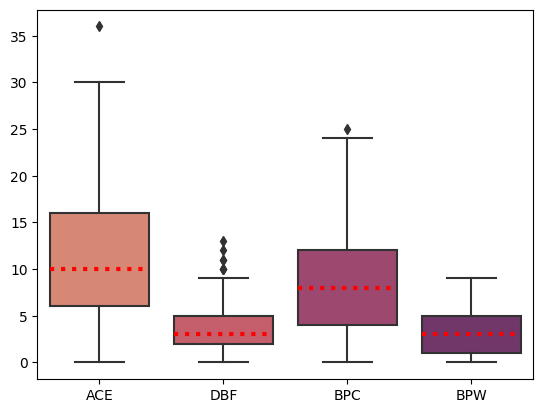

In [279]:
# For summary statistics it doesnt really matter if something was done by player one or two 
# Creating new dataframe with attributes of both players in one colummn
tennis1 = tennis.drop(columns=['Player1','Player2','Round','Result','FNL.2','FSP.2','FSW.2','SSP.2','SSW.2','ACE.2','DBF.2', \
                               'WNR.2','UFE.2','BPC.2','BPW.2','NPA.2','NPW.2','TPW.2','TPW.1','ST1.2','ST2.2','ST3.2','ST4.2','ST5.2'])

tennis2 = tennis.drop(columns=['Player1','Player2','Round','Result','FNL.1', 'FSP.1','FSW.1','SSP.1','SSW.1','ACE.1','DBF.1', \
                               'WNR.1','UFE.1','BPC.1','BPW.1','NPA.1','NPW.1','TPW.1','TPW.2','ST1.1','ST2.1','ST3.1','ST4.1','ST5.1'])

tennis2.index = tennis1.index
tennis2.columns = tennis1.columns
tennis12 = pd.concat([tennis1.reset_index(drop=True), tennis2.reset_index(drop=True)], axis= 0, ignore_index = True)
tennis12 = tennis12.rename(columns={'FNL.1':'FNL','FSP.1':'FSP','FSW.1':'FSW','SSP.1':'SSP','SSW.1':'SSW','ACE.1':'ACE','DBF.1':'DBF', \
                               'WNR.1':'WNR','UFE.1':'UFE','BPC.1':'BPC','BPW.1':'BPW','NPA.1':'NPA','NPW.1':'NPW','ST1.1':'ST1', \
                                'ST2.1':'ST2','ST3.1':'ST3','ST4.1':'ST4','ST5.1':'ST5'})
tennis12 = tennis12.replace('NA    ', np.nan)
# replace field that's entirely space (or empty) with NaN
tennis12 = tennis12.replace(r'^\s*$', np.nan, regex=True)

tennis12= tennis12.apply(pd.to_numeric, errors='ignore')
#print(tennis12.dtypes)

# Plot
sns.boxplot(data=tennis12[["ST1","ST2","ST3","ST4","ST5"]], palette='flare', medianprops={'color': 'red', 'ls': ':', 'lw': 3})

plt.show()

sns.boxplot(data=tennis12[["FSP","SSP","WNR","UFE","NPA","NPW"]], palette='flare', medianprops={'color': 'red', 'ls': ':', 'lw': 3})

plt.show()

sns.boxplot(data=tennis12[["ACE","DBF","BPC","BPW"]], palette='flare', medianprops={'color': 'red', 'ls': ':', 'lw': 3})

plt.show()

In [280]:
print(tennis12.describe())

# Put in latex document when we already have pictures??

              FNL         FSP         FSW         SSP         SSW         ACE  \
count  228.000000  228.000000  228.000000  228.000000  228.000000  228.000000   
mean     1.771930   64.100877   52.526316   35.899123   20.710526   11.219298   
std      1.327679    6.380960   16.640120    6.380960    7.498280    6.861447   
min      0.000000   43.000000   12.000000   15.000000    3.000000    0.000000   
25%      0.000000   60.000000   40.750000   32.000000   16.000000    6.000000   
50%      2.000000   64.000000   49.000000   36.000000   20.000000   10.000000   
75%      3.000000   68.000000   63.000000   40.000000   25.000000   16.000000   
max      3.000000   85.000000  102.000000   57.000000   47.000000   36.000000   

              DBF         WNR         UFE         BPC         BPW         NPA  \
count  226.000000  228.000000  228.000000  228.000000  228.000000  228.000000   
mean     3.451327   40.771930   23.951754    8.289474    2.828947   32.513158   
std      2.456705   14.9147

In [281]:
# Create statistics based on individual player results

def player_stats(name):
    player = pd.DataFrame(columns=('FNL','FSP','FSW','SSP','SSW','ACE','DBF', 'WNR','UFE','BPC','BPW','NPA','NPW','TPW','ST1', \
                               'ST2','ST3','ST4','ST5'))
    for index, row in tennis.iterrows():
        if(row["Player1"]==name):
            roww = row.tolist()
            roww = roww[4:24]
            del roww[1]
            print(roww)
            player.loc[len(player)] = roww
        if(row["Player2"]==name):
            roww = row.tolist()
            roww = roww[24:42]
            roww.insert(0, row.to_list()[5])
            print(roww)
            player.loc[len(player)] = roww
    return(player)


players = ['A.Murray','J.Janowicz','J.DelPotro','N.Djokovic']
FNL= list()
FSP= list()
FSW= list()
SSP= list()
SSW= list()
ACE= list()
DBF= list()
WNR= list()
UFE= list()
BPC= list()
BPW= list()
NPA= list()
NPW= list()
TPW= list()

for i in players:
    df = player_stats(i)
    FNL.append(df["FNL"].mean())
    #FSP.1                 First Serve Percentage for player 1 (Real Number)
    FSP.append(df["FSP"].mean())
    #FSW.1                 First Serve Won by player 1 (Real Number)
    FSW.append(df["FSW"].mean())
    #SSP.1                 Second Serve Percentage for player 1 (Real Number)
    SSP.append(df["SSP"].mean())
    #SSW.1                 Second Serve Won by player 1 (Real Number)
    SSW.append(df["SSW"].mean())
    #ACE.1                 Aces won by player 1 (Numeric-Integer)
    ACE.append(df["ACE"].mean())
    #DBF.1                 Double Faults committed by player 1 (Numeric-Integer)
    DBF.append(df["DBF"].mean())
    #WNR.1                 Winners earned by player 1 (Numeric)
    WNR.append(df["WNR"].mean())
    #UFE.1                 Unforced Errors committed by player 1 (Numeric)
    UFE.append(df["UFE"].mean())
    #BPC.1                 Break Points Created by player 1   (Numeric)
    BPC.append(df["BPC"].mean())
    #BPW.1                 Break Points Won by player 1    (Numeric) 
    BPW.append(df["BPW"].mean())
    #NPA.1                 Net Points Attempted by player 1 (Numeric)
    NPA.append(df["NPA"].mean())
    #NPW.1                 Net Points Won by player 1  (Numeric)
    NPW.append(df["NPW"].mean())
    #TPW.1                 Total Points Won by player 1 (Numeric)
    TPW.append(df["TPW"].mean())     
    #print(df.describe())


[3, 57, 39, 43, 20, 11, 2.0, 38, 16, 10, 5, 23, 17, nan, 6, 6, 6, nan, nan]
[3, 63, 44, 37, 20, 11, 1.0, 41, 14, 15, 4, 23, 19, nan, 6, 6, 7, nan, nan]
[3, 65, 44, 35, 16, 9, 0.0, 40, 14, 7, 5, 28, 20, nan, 6, 6, 7, nan, nan]
[3, 63, 55, 37, 16, 15, 4.0, 45, 16, 10, 5, 42, 31, nan, 6, 7, 6, nan, nan]
[3, 69, 72, 31, 23, 14, 3.0, 36, 27, 11, 5, 31, 22, nan, 4, 3, 6, 6.0, 7.0]
[3, 70, 60, 30, 24, 20, 1.0, 49, 15, 13, 5, 36, 22, nan, 6, 6, 6, 6.0, nan]
[3, 64, 48, 36, 16, 9, 2.0, 36, 21, 17, 7, 37, 26, nan, 6, 7, 6, nan, nan]
[3, 68, 40, 32, 17, 11, 4.0, 39, 17, 21, 5, 17, 11, nan, 6, 6, 6, nan, nan]
[3, 69, 52, 31, 16, 30, 3.0, 59, 15, 5, 3, 15, 14, nan, 7, 6, 6, nan, nan]
[3, 57, 68, 43, 36, 16, 8.0, 54, 26, 9, 3, 42, 28, nan, 3, 7, 6, 4.0, 6.0]
[3, 68, 63, 32, 12, 30, 9.0, 58, 14, 10, 3, 16, 12, nan, 7, 6, 6, nan, nan]
[1, 55, 54, 45, 27, 9, 11.0, 43, 43, 7, 1, 51, 32, nan, 7, 4, 4, 3.0, nan]
[3, 73, 45, 27, 12, 10, 1.0, 34, 10, 8, 6, 11, 9, nan, 6, 7, 6, nan, nan]
[3, 69, 46, 31, 16, 

In [286]:
import plotly.express as px
import plotly.graph_objects as go
#players = ['A.Murray','J.Janowicz','J.DelPotro','N.Djokovic']
df = pd.DataFrame({'FNL':FNL,'DBF':DBF,'BPW':BPW, 'FNL2':FNL})
fig = go.Figure()

fig.add_trace(
    go.Scatterpolar(
        theta=['FNL','DBF','BPW', 'FNL'],
        r=df.iloc[0],
        name='A.Murray'
    ))

fig.add_trace(
    go.Scatterpolar(
        theta=['FNL','DBF','BPW', 'FNL'],
        r=df.iloc[1],
        name='J.Janowicz'
    ))

fig.add_trace(
    go.Scatterpolar(
        theta=['FNL','DBF','BPW', 'FNL'],
        r=df.iloc[2],
        name='J.DelPotro'
    ))

fig.add_trace(
    go.Scatterpolar(
        theta=['FNL','DBF','BPW', 'FNL'],
        r=df.iloc[3],
        name='N.Djokovic'
    ))




In [283]:


#players = ['A.Murray','J.Janowicz','J.DelPotro','N.Djokovic']
df = pd.DataFrame({'FSP':FSP,'FSW':FSW, 'WNR':WNR, 'SSP':SSP, 'FSP2':FSP})
fig = go.Figure()

fig.add_trace(
    go.Scatterpolar(
        theta=['FSP','FSW', 'WNR', 'SSP', 'FSP'],
        r=df.iloc[0],
        name='A.Murray'
    ))

fig.add_trace(
    go.Scatterpolar(
        theta=['FSP','FSW', 'WNR', 'SSP', 'FSP'],
        r=df.iloc[1],
        name='J.Janowicz'
    ))

fig.add_trace(
    go.Scatterpolar(
        theta=['FSP','FSW', 'WNR', 'SSP', 'FSP'],
        r=df.iloc[2],
        name='J.DelPotro'
    ))

fig.add_trace(
    go.Scatterpolar(
        theta=['FSP','FSW', 'WNR', 'SSP', 'FSP'],
        r=df.iloc[3],
        name='N.Djokovic'
    ))



In [284]:
df = pd.DataFrame({'NPW':NPW,'SSW':SSW, 'ACE':ACE,'UFE':UFE, 'NPW2':NPW})
fig = go.Figure()

fig.add_trace(
    go.Scatterpolar(
        theta=['NPW','SSW', 'ACE','UFE', 'NPW'],
        r=df.iloc[0],
        name='A.Murray'
    ))

fig.add_trace(
    go.Scatterpolar(
        theta=['NPW','SSW', 'ACE','UFE', 'NPW'],
        r=df.iloc[1],
        name='J.Janowicz'
    ))

fig.add_trace(
    go.Scatterpolar(
        theta=['NPW','SSW', 'ACE','UFE', 'NPW'],
        r=df.iloc[2],
        name='J.DelPotro'
    ))

fig.add_trace(
    go.Scatterpolar(
        theta=['NPW','SSW', 'ACE','UFE', 'NPW'],
        r=df.iloc[3],
        name='N.Djokovic'
    ))
